In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
X = pd.get_dummies(df.drop('species', axis=1), dtype=int, drop_first=True)

In [10]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,0


In [11]:
y = df['species']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(
 |      n_estimators=100,
 |      *,
 |      criterion='gini',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features='sqrt',
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      bootstrap=True,
 |      oob_score=False,
 |      n_jobs=None,
 |      random_state=None,
 |      verbose=0,
 |      warm_start=False,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      max_samples=None,
 |      monotonic_cst=None
 |  )
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to p

In [50]:
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [51]:
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred = rfc.predict(X_test)

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

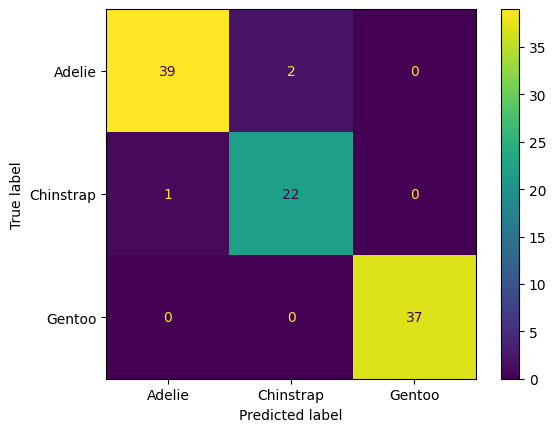

In [57]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

